In [3]:
from referenceDatabase import ReferenceDatabase
from classify import Classifier
from error import ErrorPlotter
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pickle
from PIL import Image

In [4]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
test_path = './../data/4NSigComp2010/TestSet'

# Test
ref_path_test = os.path.join(test_path, 'Reference')
que_path_test = os.path.join(test_path, 'Questioned')

## TEST

In [6]:
# Load Database

with open('./pickles/stable_DB.pkl', 'rb') as f:
    stable_DB = pickle.load(f)
    
with open('./pickles/unstable_DB.pkl', 'rb') as f:
    unstable_DB = pickle.load(f)

In [7]:
# Load Matches

with open('./pickles/matches.pkl', 'rb') as f:
    matches = pickle.load(f)

In [8]:
# Create Reference Database
ref_db = ReferenceDatabase(ref_path_test)
stable_test_DB, unstable_test_DB = ref_db.kp_DB()

In [9]:
# Save Databases
with open('./pickles/stable_test_DB.pkl', 'wb') as f:
    pickle.dump(stable_test_DB, f)
    
with open('./pickles/unstable_test_DB.pkl', 'wb') as f:
    pickle.dump(unstable_test_DB, f)

In [10]:
# Questioned Match

questioned_matches = Classifier().classify(que_path_test, stable_test_DB)

In [11]:
# Save Matches
with open('./pickles/questioned_matches.pkl', 'wb') as f:
    pickle.dump(questioned_matches, f)

In [12]:
# Answer Key

genuine_matches = questioned_matches[[48, 51, 65]]
disguised_matches = questioned_matches[[5, 14, 27, 28, 33, 86, 89]]
simulated_matches = questioned_matches[[0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17,
18, 19, 20, 21, 22, 23, 24, 25, 26, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40,
41, 42, 43, 44, 45, 46, 47, 49, 50, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83,
84, 85, 87, 88, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]]

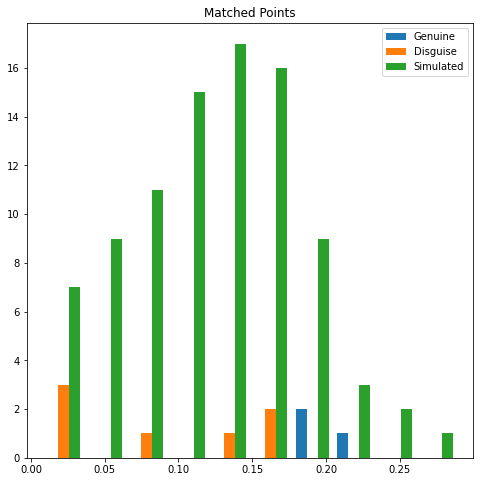

In [13]:
# Plot the matches
plt.figure(figsize = (8, 8))
match = [genuine_matches, disguised_matches, simulated_matches]
plt.hist(match, label=['Genuine', 'Disguise', 'Simulated'])
plt.legend()
plt.title('Matched Points')
plt.show()

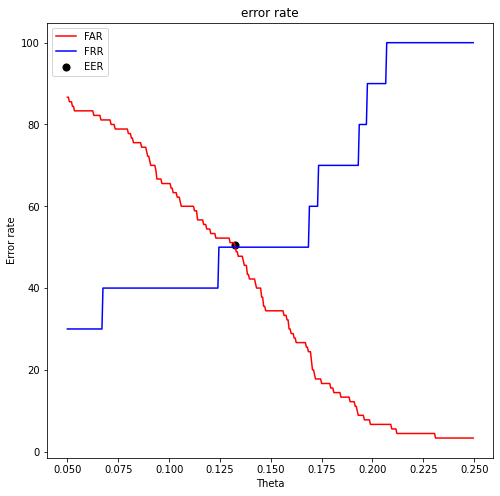

EER:  50.0


In [23]:
# Plot the error

error_plotter = ErrorPlotter(genuine_matches, disguised_matches, simulated_matches, np.arange(0.05, 0.25, 0.0005))
far, frr, eer = error_plotter.find_far_frr()
error_plotter.plot_error(0.11)
print('EER: ', eer)